### Transfer learning

In [117]:
import tensorflow as tf
from  tensorflow import keras
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [199]:
def preprocess_image(x, data_format=None):
    x = np.array(x, dtype='float32')
    x /= 255
    return x

data = ImageDataGenerator(preprocessing_function=preprocess_image)
data = data.flow_from_directory(
    './clothing-dataset-small/test/', 
    target_size=(150,150), 
    batch_size=100,
    seed=42
)

Found 372 images belonging to 10 classes.


In [194]:
classes = data.class_indices
classes

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

import math

def calculate_subplot_grid_dimensions(N):
    num_cols = math.ceil(math.sqrt(N))
    num_rows = math.ceil(N / num_cols)
    return num_rows, num_cols

def showImages(images: list, figy=3, cmap='gray', v=None):
    num_rows, num_cols = calculate_subplot_grid_dimensions(len(images))
                                                           
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figy, figy), subplot_kw={'xticks': [], 'yticks': []})
    
    fig.subplots_adjust(hspace=0, wspace=0)
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            if v:
                ax.imshow(images[i], cmap=cmap, vmax=v[1], vmin=v[0])
            else:
                ax.imshow(images[i], cmap=cmap)
    
    # Show the plot
    plt.show()

index choosen: 3


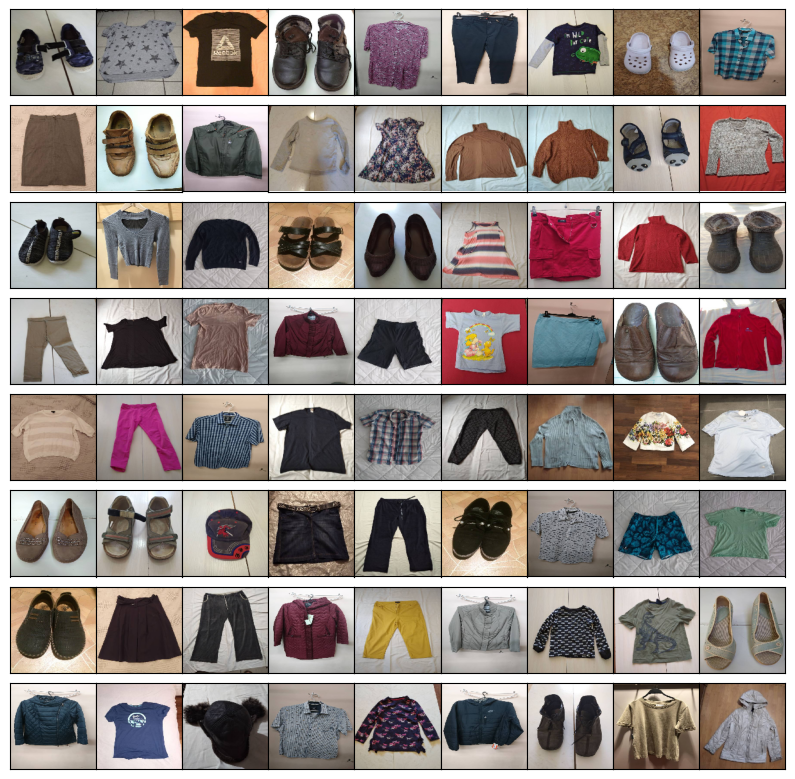

In [202]:
import random

index = random.randint(0, len(data))
print(f"index choosen: {index}")
imgs = data[index][0]
showImages(imgs, figy=10, cmap="hsv", v=(-1,1))

In [191]:
data[random.randint(0, len(data))][0].max()

255.0

array([[[174., 169., 166.],
        [178., 173., 170.],
        [182., 177., 174.],
        ...,
        [154., 149., 143.],
        [154., 149., 143.],
        [158., 153., 147.]],

       [[179., 174., 171.],
        [183., 178., 175.],
        [186., 181., 178.],
        ...,
        [153., 148., 142.],
        [156., 151., 145.],
        [164., 159., 153.]],

       [[178., 173., 170.],
        [182., 177., 174.],
        [186., 181., 178.],
        ...,
        [161., 156., 150.],
        [155., 150., 144.],
        [159., 154., 148.]],

       ...,

       [[183., 185., 182.],
        [184., 184., 182.],
        [183., 182., 178.],
        ...,
        [178., 173., 170.],
        [173., 168., 165.],
        [169., 164., 161.]],

       [[177., 179., 176.],
        [179., 179., 177.],
        [179., 178., 174.],
        ...,
        [179., 174., 171.],
        [172., 167., 164.],
        [170., 165., 162.]],

       [[168., 170., 167.],
        [177., 177., 175.],
        [180., 1